# Dataset

In [4]:
# Predict Bitcoin price for next 30 days

In [4]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression
import numpy as dragon
from sklearn.metrics import mean_squared_error
from binance.client import Client
import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import random
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing

In [5]:
#using API to get recent data from Binance
api_key='kikMm5wCFBWPs8i6apOEPBopkfCMDFqhWaonzOrFjtUyZoVb0Zimj2KN5k3JN4L3'
api_secret='7oRcw5SiuSYSVUXWELkKZomLQ6UQFfAsuYWxOVbmnKTulxUxZMCUCtmQ0RwlWW42'
client = Client(api_key, api_secret)

In [6]:
# #Fetchinf Bitcoin Dataset
# symbol='BCHUSDT'
# BCH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")
# symbol='ETHBTC'
# ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")

In [7]:
#Fetchinf Bitcoin Dataset
symbol='BTCUSDT'
BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
# symbol='LTCBTC'
# LTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")

In [8]:
#adding columns to the dataset
BTC=pd.DataFrame(BTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
# LTC=pd.DataFrame(LTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])

In [9]:
#Open time was converted to date-time format from String 
BTC['Open time']=pd.to_datetime(BTC['Open time'],unit='ms')
BTC['Close time']=pd.to_datetime(BTC['Close time'],unit='ms')
# LTC['Open time']=pd.to_datetime(LTC['Open time'],unit='ms')
# LTC['Close time']=pd.to_datetime(LTC['Close time'],unit='ms')

In [10]:
print(BTC.columns)

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Can be ignored'],
      dtype='object')


In [11]:
print("Shape of the dataset:",BTC.shape)
# print("Shape of the dataset:",LTC.shape)

Shape of the dataset: (2880, 12)


In [12]:
print("BTC Datatypes:")
print(BTC.dtypes)
# print("LTC Datatypes:",LTC.dtypes)

BTC Datatypes:
Open time                       datetime64[ns]
Open                                    object
High                                    object
Low                                     object
Close                                   object
Volume                                  object
Close time                      datetime64[ns]
Quote asset volume                      object
Number of trades                         int64
Taker buy base asset volume             object
Taker buy quote asset volume            object
Can be ignored                          object
dtype: object


In [13]:
# making Open time as index
# BTC.set_index('Open time',inplace=True)
#LTC.set_index('Open time',inplace=True)

In [14]:
#converting Close prices to float from String
#The Close column measures the final price at the end of each interval
BTC['Close']=BTC['Close'].astype(float)
BTC['Volume']=BTC['Volume'].astype(float)
# LTC['Close']=LTC['Close'].astype(float)
# LTC['Volume']=LTC['Volume'].astype(float)

In [15]:
#BTC['Close'].plot(figsize=(20,10),title='Close price vs Time')

In [16]:
#BTC['Volume'].plot(figsize=(20,10),title='1 year')

In [17]:
print("BTC statistics:")
print(BTC.describe())
# print("LTC statistics:",LTC.describe())

BTC statistics:
             Close       Volume  Number of trades
count  2880.000000  2880.000000       2880.000000
mean   8992.721128    88.409736        795.060069
std     470.006889   159.329290       1053.298623
min    8218.020000     1.696319         33.000000
25%    8663.217500    27.544257        367.000000
50%    8741.505000    45.088600        520.000000
75%    9625.837500    82.777267        795.250000
max    9792.790000  2028.988923      15020.000000


In [18]:
# LTC.isnull().any()
BTC.isnull().any()

Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool

In [19]:
BTC.tail()

Open time           Open           High            Low  \
2875 2020-05-11 09:05:00  8593.05000000  8602.19000000  8593.05000000   
2876 2020-05-11 09:06:00  8599.40000000  8609.08000000  8596.01000000   
2877 2020-05-11 09:07:00  8598.00000000  8601.69000000  8572.37000000   
2878 2020-05-11 09:08:00  8590.95000000  8592.20000000  8578.20000000   
2879 2020-05-11 09:09:00  8581.18000000  8584.00000000  8579.99000000   

        Close      Volume              Close time Quote asset volume  \
2875  8599.39   33.406340 2020-05-11 09:05:59.999    287260.27132154   
2876  8598.01   31.046049 2020-05-11 09:06:59.999    267065.04777477   
2877  8590.96  106.765374 2020-05-11 09:07:59.999    916426.28823425   
2878  8579.46   31.254972 2020-05-11 09:08:59.999    268298.12863371   
2879  8582.33    1.696319 2020-05-11 09:09:59.999     14558.61608233   

      Number of trades Taker buy base asset volume  \
2875               599                 22.18665500   
2876               407                  7.72220000   
2877               849                 26.16654300   
2878               393                 14.06802800   
2879                33                  1.13502300   

     Taker buy quote asset volume Can be ignored  
2875              190791.37486176              0  
2876               66441.05183698              0  
2877              224642.66793280              0  
2878              120782.83695285              0  
2879                9741.92587807              0

In [20]:
main_df = pd.DataFrame() # begin empty

ratios = ["BTC-USD"] 
datasets = [BTC]# the 4 ratios we want to consider
for i in range(len(ratios)):  # begin iteration
    ratio=ratios[i]
    print(ratio)
    df = datasets[i]

    # rename volume and close to include the ticker so we can still which close/volume is which:
    df.rename(columns={"Close": f"{ratio}_Close", "Volume": f"{ratio}_Volume"}, inplace=True)

    df.set_index("Open time", inplace=True)  # set time as index so we can join them on this shared time
    df = df[[f"{ratio}_Close", f"{ratio}_Volume"]]  # ignore the other columns besides price and volume

    if len(main_df)==0:  # if the dataframe is empty
        main_df = df  # then it's just the current df
    else:  # otherwise, join this data to the main one
        main_df = main_df.join(df)

main_df.fillna(method="ffill", inplace=True)  # if there are gaps in data, use previously known values
main_df.dropna(inplace=True)
print(main_df.head(10))  # how did we do??

BTC-USD
                     BTC-USD_Close  BTC-USD_Volume
Open time                                         
2020-05-09 09:10:00        9710.89       46.333564
2020-05-09 09:11:00        9712.17       29.729455
2020-05-09 09:12:00        9717.74       40.428968
2020-05-09 09:13:00        9710.18       73.601028
2020-05-09 09:14:00        9712.61       41.080513
2020-05-09 09:15:00        9711.00       78.655588
2020-05-09 09:16:00        9693.80      117.243736
2020-05-09 09:17:00        9701.85       38.042035
2020-05-09 09:18:00        9706.03       30.745705
2020-05-09 09:19:00        9709.21       47.745879


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [159]:
SEQ_LEN = 60  # how long of a preceeding sequence to collect for training model
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?
RATIO_TO_PREDICT = "BTC-USD"

main_df['future'] = main_df[f'{RATIO_TO_PREDICT}_Close'].shift(-FUTURE_PERIOD_PREDICT)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [160]:
print(main_df[[f'{RATIO_TO_PREDICT}_Close','future']].head())

                     BTC-USD_Close   future
Open time                                  
2020-05-08 13:58:00        9875.24  9883.06
2020-05-08 13:59:00        9883.06  9882.43
2020-05-08 14:00:00        9882.43  9879.39
2020-05-08 14:01:00        9879.39  9878.08
2020-05-08 14:02:00        9878.08  9880.02


In [161]:
#train  and vaidation split
#Note: why we take chunk and not random data
times = sorted(main_df.index.values)  # get the times
last_5pct = sorted(main_df.index.values)[-int(0.05*len(times))]  # get the last 5% of the times

validation_main_df = main_df[(main_df.index >= last_5pct)]  # make the validation data where the index is in the last 5%
main_df = main_df[(main_df.index < last_5pct)]  

In [162]:
print(validation_main_df.head())

                     BTC-USD_Close  BTC-USD_Volume   future
Open time                                                  
2020-05-10 11:34:00        8713.97       64.979969  8722.17
2020-05-10 11:35:00        8722.17       35.216048  8729.01
2020-05-10 11:36:00        8729.01       28.724342  8731.95
2020-05-10 11:37:00        8731.95       54.734535  8727.47
2020-05-10 11:38:00        8727.47       34.824278  8732.99


In [163]:
print(main_df.tail())

                     BTC-USD_Close  BTC-USD_Volume   future
Open time                                                  
2020-05-10 11:29:00        8715.87      123.110568  8733.23
2020-05-10 11:30:00        8733.23       61.793483  8729.03
2020-05-10 11:31:00        8729.03       22.949095  8724.35
2020-05-10 11:32:00        8724.35       68.345955  8703.30
2020-05-10 11:33:00        8703.30       92.097724  8713.97


In [164]:
print(len(main_df))
print(len(validation_main_df))

2736
144


In [165]:
# forming feature set for each future price
def preprocess_df(df):

    for col in df.columns:  # go through all of the columns
        if col != "future":  # normalize all ... except for the target itself!
            df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
            df = df.replace([np.inf, -np.inf], np.nan)
            df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
            df[col] = preprocessing.scale(df[col].values)  

    df.dropna(inplace=True)  # cleanup again... jic.
    #print(df)

    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]]) 

    random.shuffle(sequential_data)  # shuffle for good measure.
    X = []
    y = []
    #print(sequential_data)
    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), y  # return X and y...and make X a numpy array!


In [166]:
train_x, train_y = preprocess_df(main_df) 
validation_x, validation_y = preprocess_df(validation_main_df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [167]:
print(validation_x.shape)
print(len(validation_y))

(82, 60, 2)
82


In [168]:
print(train_x.shape)
print(len(train_y))

(2675, 60, 2)
2675


In [169]:
train_x=train_x.reshape(len(train_x),120)

In [170]:
validation_x=validation_x.reshape(len(validation_x),120)

In [171]:
np.random.seed(1)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2)) 
#kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
print(gp)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(train_x, train_y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Confidenne at Test point predictions ",1.9600 * sigma)

rms = sqrt(mean_squared_error(validation_y, y_pred))
print(rms)


# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
# plt.figure()
# plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
# plt.plot(X, y, 'r.', markersize=10, label='Observations')
# plt.plot(x, y_pred, 'b-', label='Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('$x$')
# plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
# plt.legend(loc='upper left')


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
GPML kernel: 31.6**2 * RBF(length_scale=9.28)
Log-marginal-likelihood: -9508069.386
Value at Test points [8063.96464456 8382.26177425 7708.7667529  7659.17891524 7940.38618006
 7994.60967335 7756.4750957  8122.65915697 7778.23710197 7970.40265011
 8183.13931609 8254.71427979 8145.89012465 7652.76607742 7583.15013403
 7592.00060588 7965.04505373 7739.76532905 8282.61520667 7832.0133838
 7589.5405885  7873.10281594 7643.8372768  7681.17400563 7740.62643584
 8190.182746   8140.19802799 8050.67366064 8082.18318396 7865.67943551
 7950.07136333 8049.16533905 8023.81104815 7670.92019079 7907.93600608
 7846.25058102 8051.85468822 8112.49053683 8199.70618377 7593.1485747
 7753.32294003 8001.79623171 7610.57020218 7889.30935745 7839.72495389
 7

# Visualization

In [21]:
BTC_new=BTC

In [22]:
#  making Open time as index
# BTC_new.set_index('Open time',inplace=True)
#LTC.set_index('Open time',inplace=True)

Text(0, 0.5, 'Close Amount')

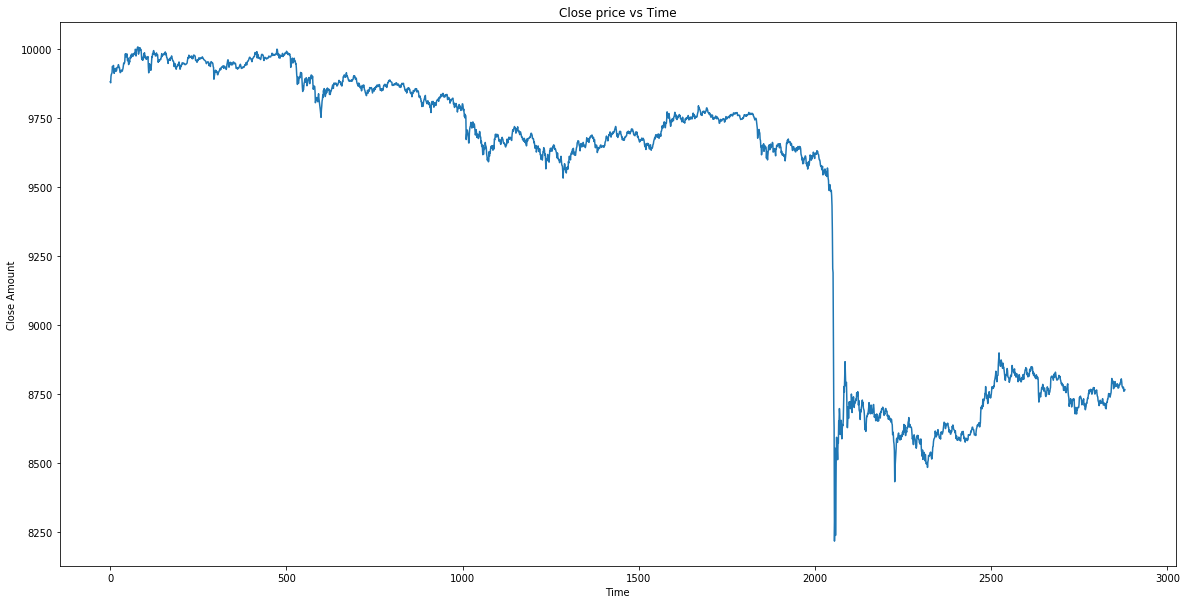

In [209]:
BTC['Close'].plot(figsize=(20,10),title='Close price vs Time')
#BTC_new['Volume'].plot(figsize=(20,10),title='Close price vs Time')
plt.xlabel('Time') 
plt.ylabel('Close Amount') 

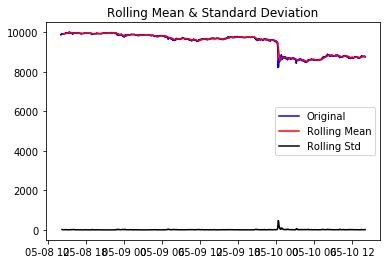

ADF Stastistic: -0.607282
p-value: 0.869328
The graph is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [210]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = main_df['BTC-USD_Close']      
test_stationarity(ts)

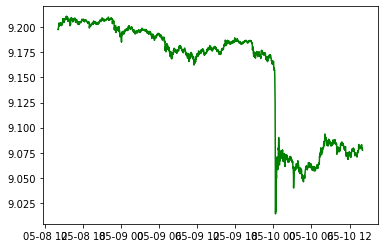

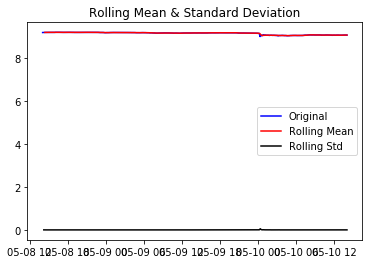

ADF Stastistic: -0.627395
p-value: 0.864671
The graph is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [211]:
ts_log = dragon.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

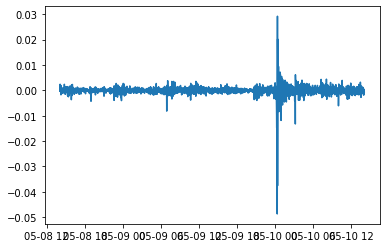

In [212]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

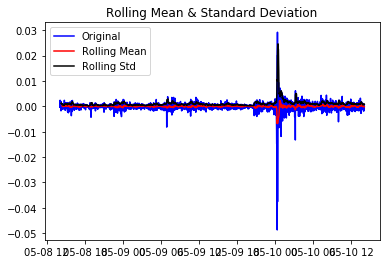

ADF Stastistic: -11.567991
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [213]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [240]:
print(ts_log_diff)

Open time
2020-05-08 14:05:00    0.000522
2020-05-08 14:06:00   -0.000410
2020-05-08 14:07:00    0.002414
2020-05-08 14:08:00    0.000727
2020-05-08 14:09:00    0.000175
                         ...   
2020-05-10 13:59:00   -0.000381
2020-05-10 14:00:00    0.000453
2020-05-10 14:01:00   -0.001698
2020-05-10 14:02:00    0.000204
2020-05-10 14:03:00   -0.000559
Name: BTC-USD_Close, Length: 2879, dtype: float64


In [ ]:
print(type(ts_log_diff))
ts_log_diff=ts_log_diff.to_numpy()

In [261]:
data=pd.DataFrame()
data['Open time']=BTC['Open time']
data['Close']=pd.DataFrame(ts_log_diff)  


In [262]:
print(data.head())

            Open time     Close
0 2020-05-08 14:05:00  0.000522
1 2020-05-08 14:06:00 -0.000410
2 2020-05-08 14:07:00  0.002414
3 2020-05-08 14:08:00  0.000727
4 2020-05-08 14:09:00  0.000175


In [263]:
SEQ_LEN = 60  # how long of a preceeding sequence to collect for training model
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?
RATIO_TO_PREDICT = "BTC-USD"

data['future'] = data['Close'].shift(-FUTURE_PERIOD_PREDICT)

In [264]:
data.set_index('Open time',inplace=True)

In [276]:
data.fillna(method="ffill", inplace=True) 

In [277]:
data.isnull().any()

Close     False
future    False
dtype: bool

In [285]:
data.to_csv('file1.csv') 

In [278]:
#train  and vaidation split
#Note: why we take chunk and not random data
times = sorted(data.index.values)  # get the times
last_5pct = sorted(data.index.values)[-int(0.05*len(times))]  # get the last 5% of the times

validation_main_df = data[(data.index >= last_5pct)]  # make the validation data where the index is in the last 5%
main_df = data[(data.index < last_5pct)]  

In [279]:
print(validation_main_df.head())

                        Close    future
Open time                              
2020-05-10 11:41:00 -0.003176 -0.002030
2020-05-10 11:42:00 -0.002030 -0.000898
2020-05-10 11:43:00 -0.000898  0.001206
2020-05-10 11:44:00  0.001206  0.001479
2020-05-10 11:45:00  0.001479 -0.001029


In [280]:
# forming feature set for each future price
def preprocess_df(df):

#     for col in df.columns:  # go through all of the columns
#         if col != "future":  # normalize all ... except for the target itself!
#             df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
#             df = df.replace([np.inf, -np.inf], np.nan)
#             df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
#             df[col] = preprocessing.scale(df[col].values)  

#     df.dropna(inplace=True)  # cleanup again... jic.
#     #print(df)

    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]]) 

    random.shuffle(sequential_data)  # shuffle for good measure.
    X = []
    y = []
    #print(sequential_data)
    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), y  # return X and y...and make X a numpy array!


In [281]:
train_x, train_y = preprocess_df(main_df) 
validation_x, validation_y = preprocess_df(validation_main_df)

In [282]:
print(validation_x.shape)

(85, 60, 1)


In [283]:
train_x=train_x.reshape(len(train_x),60)
validation_x=validation_x.reshape(len(validation_x),60)

In [284]:
np.random.seed(1)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2)) 
#kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
print(gp)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(train_x, train_y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Confidenne at Test point predictions ",1.9600 * sigma)

rms = sqrt(mean_squared_error(validation_y, y_pred))
print(rms)


# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
# plt.figure()
# plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
# plt.plot(X, y, 'r.', markersize=10, label='Observations')
# plt.plot(x, y_pred, 'b-', label='Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('$x$')
# plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
# plt.legend(loc='upper left')


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
GPML kernel: 0.0316**2 * RBF(length_scale=0.0163)
Log-marginal-likelihood: 12264.509
Value at Test points [ 4.06604984e-03 -3.01108195e-03  1.79784028e-03 -2.11174891e-03
  3.78434026e-05  1.68401434e-03  1.64195889e-03 -1.23339526e-03
  2.28990328e-04  9.10495077e-04  5.56952161e-05 -5.11321945e-04
 -5.15672318e-03 -7.04063794e-04  1.05656347e-03  9.06115798e-04
  2.15496975e-03 -2.54599366e-03  2.68461560e-03  2.00079737e-03
 -4.18864610e-03  1.35184482e-03  1.03676143e-03 -1.60824386e-03
 -1.18749898e-04  8.15249590e-04 -8.97230931e-04 -3.68508154e-03
 -3.99211986e-03 -2.79596587e-03 -6.90007636e-04  2.59129354e-03
  4.29165166e-03 -2.12036779e-03  1.12131757e-03 -1.27900808e-03
 -1.85987310e-04  3.65440678e-03 -1.19407496e-04 -3.9

In [23]:
BTC.head()

Open           High            Low  \
Open time                                                          
2020-05-09 09:10:00  9700.92000000  9712.12000000  9700.00000000   
2020-05-09 09:11:00  9711.04000000  9714.29000000  9710.52000000   
2020-05-09 09:12:00  9712.33000000  9718.97000000  9712.18000000   
2020-05-09 09:13:00  9717.67000000  9717.68000000  9706.26000000   
2020-05-09 09:14:00  9710.89000000  9714.08000000  9710.28000000   

                     BTC-USD_Close  BTC-USD_Volume              Close time  \
Open time                                                                    
2020-05-09 09:10:00        9710.89       46.333564 2020-05-09 09:10:59.999   
2020-05-09 09:11:00        9712.17       29.729455 2020-05-09 09:11:59.999   
2020-05-09 09:12:00        9717.74       40.428968 2020-05-09 09:12:59.999   
2020-05-09 09:13:00        9710.18       73.601028 2020-05-09 09:13:59.999   
2020-05-09 09:14:00        9712.61       41.080513 2020-05-09 09:14:59.999   

                    Quote asset volume  Number of trades  \
Open time                                                  
2020-05-09 09:10:00    449661.73206580               501   
2020-05-09 09:11:00    288723.45282834               409   
2020-05-09 09:12:00    392826.88450639               539   
2020-05-09 09:13:00    714754.84150199               711   
2020-05-09 09:14:00    398964.10477762               387   

                    Taker buy base asset volume Taker buy quote asset volume  \
Open time                                                                      
2020-05-09 09:10:00                 21.81729100              211698.51838575   
2020-05-09 09:11:00                 15.48882100              150422.21887701   
2020-05-09 09:12:00                 19.68831600              191298.94528014   
2020-05-09 09:13:00                 19.97530600              193966.37427690   
2020-05-09 09:14:00                 15.12570100              146904.70925611   

                    Can be ignored  
Open time                           
2020-05-09 09:10:00              0  
2020-05-09 09:11:00              0  
2020-05-09 09:12:00              0  
2020-05-09 09:13:00              0  
2020-05-09 09:14:00              0

In [33]:
series=BTC_new['BTC-USD_Close']
print(type(series))

<class 'pandas.core.series.Series'>


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


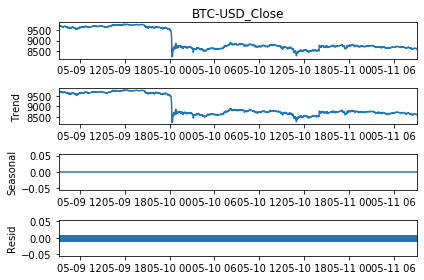

In [34]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


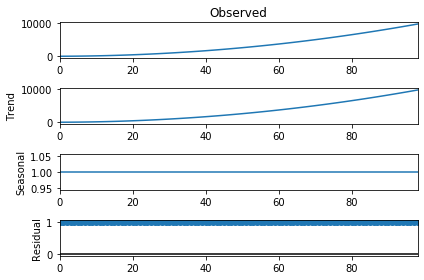

In [35]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()